# DOWNLOAD DATASET

data yang digunakan memiliki 6 class :
1.	Cardboard atau kardus berjumlah 393 images,
2.	glass atau kaca berjumlah 491 images,
3.	metal atau kaleng berjumlah 400 images,
4.	paper atau kertas berjumlah 584 images,
5.	plastic atau plastik berjumalah 472 images,
6.	trash berjumlah 127 images.

source data : kaggle


code dibawah ini akan mendowload dataset yang sudah saya taruh di gdrive saya, dengan setting "share with anyone". link bisa diubah jika teman-teman ingin mendowload dataset lainnya yang kalian punya

In [7]:
!gdown 1SQe0PcWxwv0EkGn2SKaw9DWp_816RQGJ

Downloading...
From: https://drive.google.com/uc?id=1SQe0PcWxwv0EkGn2SKaw9DWp_816RQGJ
To: /content/dataset_6classtrash.zip
100% 42.7M/42.7M [00:00<00:00, 57.5MB/s]


# EKSTRAK FROM ZIP FILE

data yang saya upload di gdrive, saya compress menjadi zipfile agar memperkecil ukuran. oleh karena itu setelah dataset di dowload butuh di unzip terlebih dahulu.

In [2]:
!unzip dataset_6classtrash.zip -d data

Archive:  dataset_6classtrash.zip
   creating: data/dataset_6classtrash/cardboard/
  inflating: data/dataset_6classtrash/cardboard/cardboard1.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard10.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard100.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard101.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard102.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard103.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard104.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard105.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard106.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard107.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard108.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard109.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard11.jpg  
  inflating: data/dataset_6classtrash/cardboard/ca

# LABELING DATA

image_dataset_from_directory secara otomatis akan memuat gambar-gambar dari setiap subfolder dan membentuk dataset dengan membaginya menjadi per-batch. terdapat 6 subfolder pada folder 'data/dataset_6classtrash' alhasil output akan menghasilkan jumlah seluruh image pada folder, yakni 2527 dan 6 classes diambil dari berapa banyak subfolder pada folder 'data/dataset_6classtrash'

In [3]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data/dataset_6classtrash')

Found 2527 files belonging to 6 classes.


In [4]:
# Get the class names
class_names = data.class_names

# Print the class names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


Fungsi as_numpy_iterator() digunakan untuk mengonversi dataset yang telah dibaca menjadi iterator Numpy. Iterator ini memungkinkan Anda untuk mengakses elemen-elemen dataset dalam bentuk array Numpy.

In [5]:
data_iterator = data.as_numpy_iterator()


fungsi next() memungkinkan Anda untuk mengiterasi melalui elemen-elemen iterator satu per satu, mengambil setiap elemen secara berurutan.

In [6]:
batch = data_iterator.next()

# MELIHAT PEMBAGIAN BATCH
ukuran per batch menampung 32 image dalam bentuk array + labelnya.
memiliki ukuran pixel gambar 256x256
dan memiliki 3 channels yakni RGB.
Jika per batch memiliki ukuran 32 images + label, lalu ada berapa batch jika ada 2527 images yang kita miliki? maka 2527 / 32 = 78.9 jika dibulatkan menjadi 79. maka total batch yang kita miliki ada 79 batch.

batch[0] adalah tempat menampung array gambar
batch[1] adalah tempat menampung labelnya

mengapa butuh dibagi perbatch? mengapa tidak langsung saja 2527 image sekaligus? dibagi per-batch tujuannya agar meringankan memory saat proses training nantinya

In [8]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1].shape

(32,)

# MELIHAT SAMPEL IMAGE

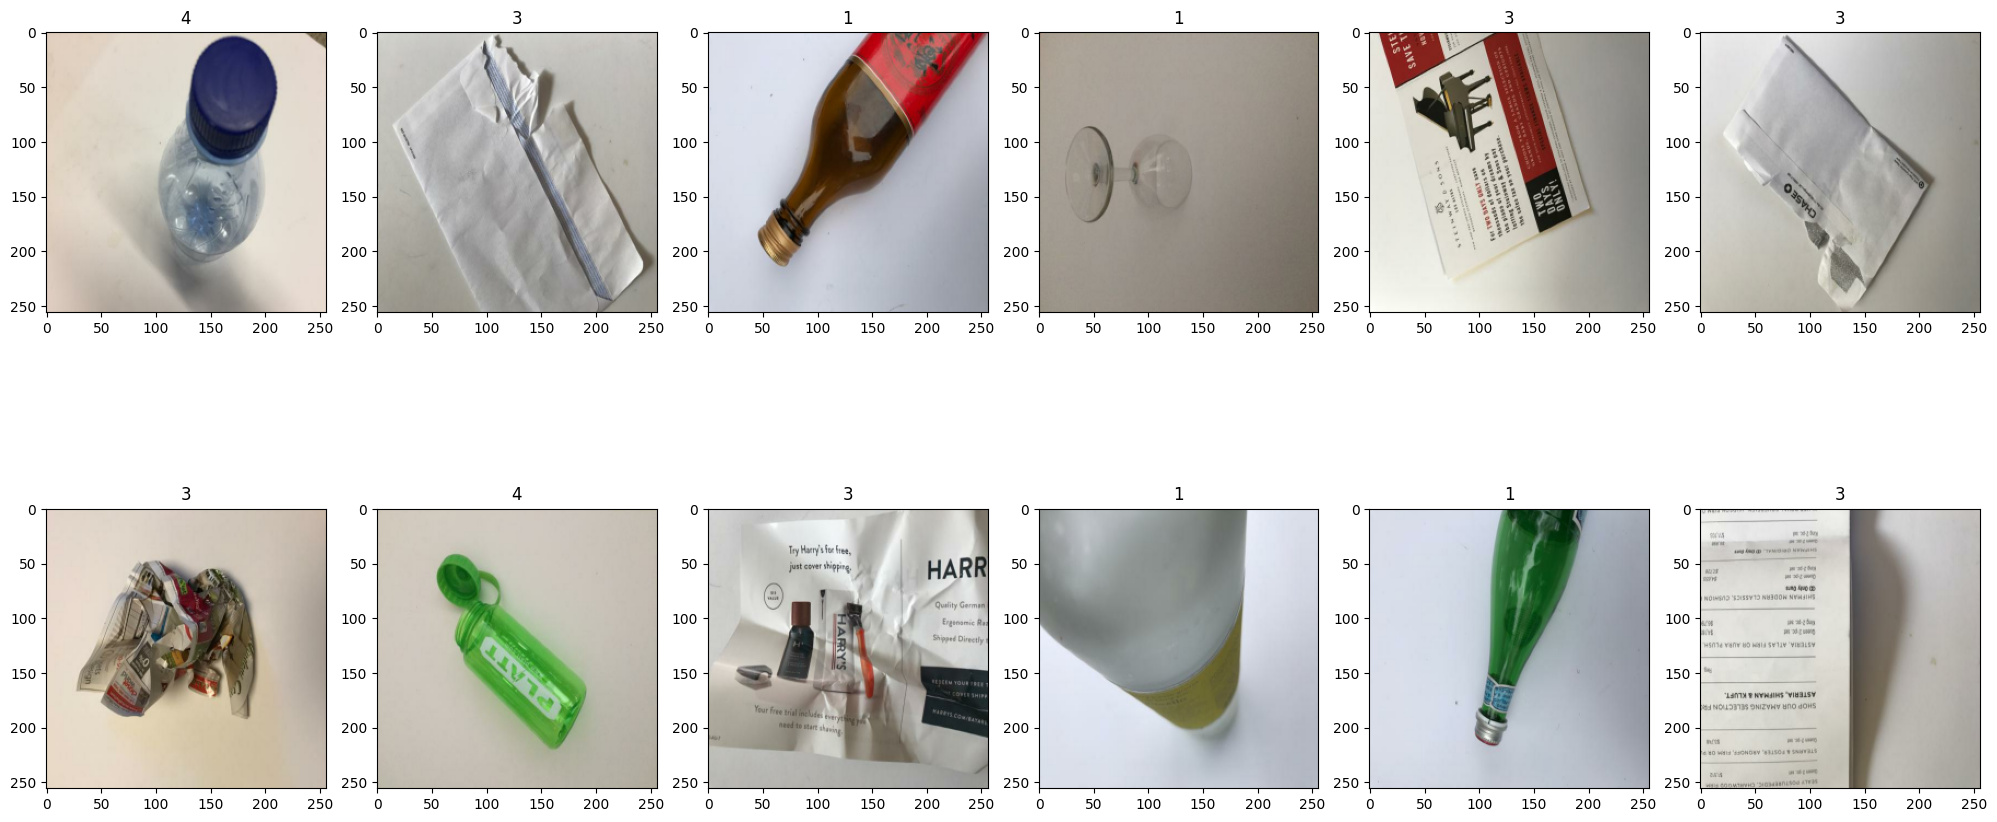

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:12]):
    row_idx = idx // 6  # Determine the row index
    col_idx = idx % 6   # Determine the column index
    ax[row_idx, col_idx].imshow(img.astype(int))
    ax[row_idx, col_idx].title.set_text(str(batch[1][idx]))

plt.tight_layout(rect=[0, 0, 1, 0.70])  # Adjust the layout and specify the rectangle
plt.show()

# SCALED PIXEL VALUE 0-255 TO 0-1

mengapa perlu scaled nilai pixel 0-255 menjadi 0-1? karena komputer akan lebih baik memproses data 0-1. dengan menscaled data, akan mempermudah komputer untuk belajar

In [37]:
# Applying the scaling operation
data = data.map(lambda x, y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          [1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          [1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          ...,
          [9.62491313e-18, 9.79206069e-18, 1.01820722e-17],
          [9.62491313e-18, 9.79206069e-18, 1.01820722e-17],
          [9.62491313e-18, 9.79206069e-18, 1.01820722e-17]],
 
         [[1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          [1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          [1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          ...,
          [9.58312645e-18, 9.75027401e-18, 1.01402847e-17],
          [9.58312645e-18, 9.75027401e-18, 1.01402847e-17],
          [9.58312645e-18, 9.75027401e-18, 1.01402847e-17]],
 
         [[1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          [1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          [1.09760233e-17, 1.10874545e-17, 1.17560431e-17],
          ...,
          [9.56919756e-18, 9.73634512e-18, 1.0126

# SPLIT DATA TO TRAIN AND VALIDATION

In [41]:
len(data)

79

In [43]:
train_size = int(len(data)*.9)
val_size = int(len(data)*.1)+1


TRAIN SIZE 90%

In [44]:
train_size

71

VAL SIZE 10%

In [45]:
val_size

8

In [46]:
train_size+val_size

79

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# MODELLING WITH CNN

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# CUSTOM CALLBACKS IF REACH ACCURACY 98

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def __init__(self, target_accuracy=0.98):
        super(AccuracyStopCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            self.model.stop_training = True

# Create an instance of the AccuracyStopCallback
accuracy_stop_callback = AccuracyStopCallback(target_accuracy=0.98)

# TRAINING

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[accuracy_stop_callback])

Epoch 1/20
71/71 [==============================] - 150s 2s/step - loss: 1.5800 - accuracy: 0.3415 - val_loss: 1.3748 - val_accuracy: 0.4431
Epoch 2/20
71/71 [==============================] - 148s 2s/step - loss: 1.2560 - accuracy: 0.5123 - val_loss: 1.2187 - val_accuracy: 0.5137
Epoch 3/20
71/71 [==============================] - 148s 2s/step - loss: 1.0751 - accuracy: 0.5946 - val_loss: 1.0342 - val_accuracy: 0.6000
Epoch 4/20
71/71 [==============================] - 149s 2s/step - loss: 0.8859 - accuracy: 0.6664 - val_loss: 1.0044 - val_accuracy: 0.6392
Epoch 5/20
71/71 [==============================] - 147s 2s/step - loss: 0.6580 - accuracy: 0.7663 - val_loss: 0.9158 - val_accuracy: 0.6745
Epoch 6/20
71/71 [==============================] - 148s 2s/step - loss: 0.4476 - accuracy: 0.8490 - val_loss: 0.6078 - val_accuracy: 0.8196
Epoch 7/20
71/71 [==============================] - 148s 2s/step - loss: 0.3352 - accuracy: 0.9010 - val_loss: 0.6574 - val_accuracy: 0.7647
Epoch 8/20
71

# PLOT ACCURACY AND LOSS

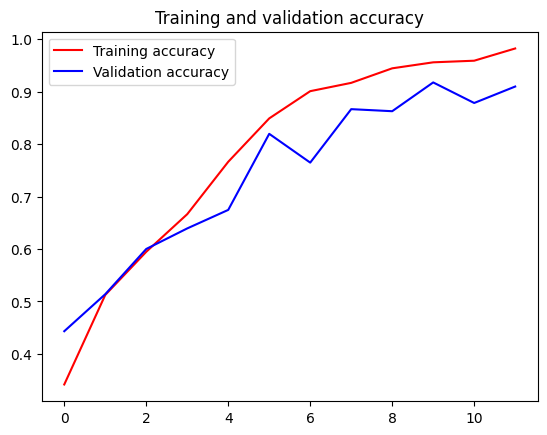

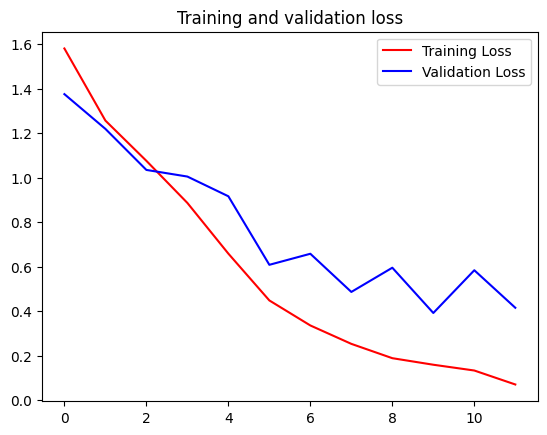

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')  # Save the plot as an image
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot as an image

plt.show()


# TEST THE MODEL WITH AN INPUT IMAGE

In [63]:
import cv2
import matplotlib

preview the image first

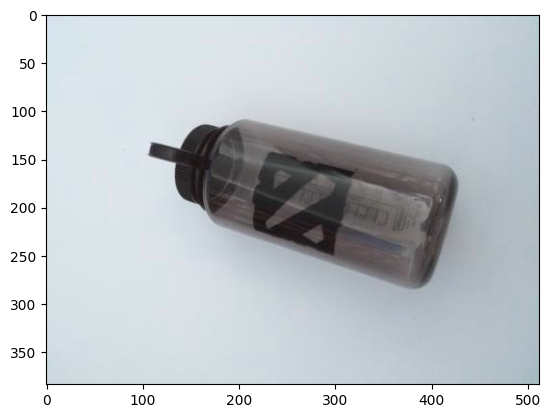

In [64]:
img = cv2.imread('data/dataset_6classtrash/plastic/plastic1.jpg')
plt.imshow(img)
plt.show()

resize the image, karena model kita dilatih dengan input layer 256x256. maka gambar yang akan kita test atau masukan ke model harus di resize juga menjadi 256x256

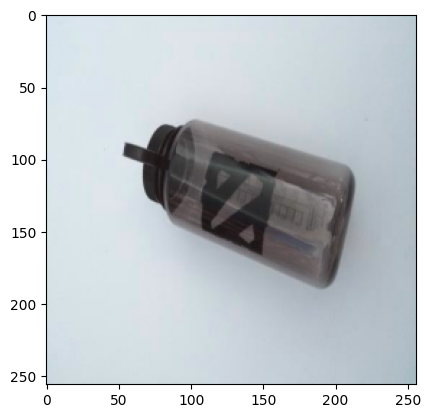

In [65]:
import numpy as np
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
import numpy as np

# Assuming `resize` is the image you want to predict
# Assuming `class_names` is the list of class names

# Preprocess the image
scaled_pixel_value = resize / 255.0
input_image = np.expand_dims(scaled_pixel_value, axis=0)

# Make predictions
yhat = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(yhat, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Get the class probabilities
class_probabilities = yhat[0]

# Print the predicted class and probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

NameError: ignored

# SAVE THE MODEL TO H5



In [67]:
from tensorflow.keras.models import load_model
import os

In [ ]:
model.save(os.path.join('saved_model','trashclassifier.h5'))

In [ ]:
export_dir = 'saved_model'

tf.saved_model.save(model,export_dir=export_dir)

# SAVE THE MODEL TO TFLITE

In [ ]:
# Select mode of optimization
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert();

In [ ]:
import tensorflow as tf

# Assuming `tflite_model` is the generated TFLite model
saved_folder = 'saved_model'
tflite_model_path = f'{saved_folder}/model.tflite'

# Write the TFLite model to a file
tf.io.write_file(tflite_model_path, tflite_model)

print("TFLite model saved successfully.")


TFLite model saved successfully.


# TESTING WITH 50 RANDOM IMAGE BY READ MODEL.TFLITE

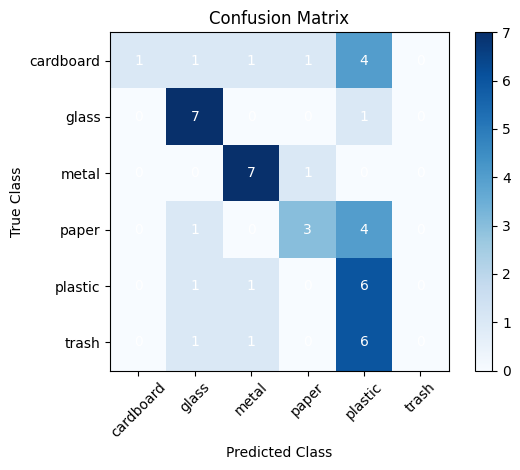

In [54]:
import os
import random
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming `class_names` is the list of class names
class_names = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Path to the dataset folder
dataset_folder = "data/dataset_6classtrash"

# Number of images to test
num_images = 50

# Create lists to store predictions, class names, and probabilities
predictions = []
true_labels = []

# Load the TensorFlow Lite model
model_path = "model.tflite"
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get the input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Randomly select 50 images from the dataset
image_files = []
for class_name in class_names:
    class_folder = os.path.join(dataset_folder, class_name)
    images = os.listdir(class_folder)
    random.shuffle(images)
    image_files.extend([os.path.join(class_folder, img) for img in images[:num_images // len(class_names)]])

# Iterate over the selected image files
for image_file in image_files:
    # Load and preprocess the image
    image = cv2.imread(image_file)
    resized_image = cv2.resize(image, (256, 256)) / 255.0
    input_image = np.expand_dims(resized_image, axis=0)

    # Set the input tensor data
    input_data = np.array(input_image, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run the interpreter
    interpreter.invoke()

    # Get the output tensor data
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Get the predicted class index
    predicted_class_index = np.argmax(output_data, axis=1)

    # Store the predictions and true labels
    predictions.append(predicted_class_index[0])
    true_labels.append(class_names.index(os.path.basename(os.path.dirname(image_file))))

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Add text to the heatmap
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='white')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and labels
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(class_names, rotation=45)
ax.set_yticklabels(class_names)
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')

# Save the plot as an image
plt.savefig('confusion_matrix.png')

# Show the plot
plt.tight_layout()
plt.show()


# SEE ACCURACY, PRECISION, RECALL, F1 SCORE

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')

# Print the scores with two decimal places
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.50
Precision: 0.54
Recall: 0.50
F1 Score: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
